<center>
<font size="6">Análisis exploratorio de datos para armar un sistema de recomendación de películas</font>
</center>


In [33]:
#Cargo las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Cargo los archivos parquet producto del ETL

df_peliculas = pd.read_parquet("C:/Users/jugas/Proyecto/Proyecto/data/info_peliculas.parquet")
df_reparto = pd.read_parquet("C:/Users/jugas/Proyecto/Proyecto/data/data_actor.parquet")
df_equipo = pd.read_parquet("C:/Users/jugas/Proyecto/Proyecto/data/data_director.parquet")

Comienzo inspeccionando el dataset de peliculas


In [35]:
df_peliculas.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,None,Toy Story,7.7,5415.0,1995.0,12.451801
1,not collection,65000000,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,0.000000
3,not collection,16000000,"[Comedy, Drama, Romance]",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.090760
4,Father of the Bride Collection,0,[Comedy],11862.0,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,inf


In [36]:
print(df_peliculas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45433 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  45433 non-null  object 
 1   budget                 45433 non-null  int64  
 2   genres                 45433 non-null  object 
 3   id                     45433 non-null  float64
 4   original_language      45422 non-null  object 
 5   overview               44479 non-null  object 
 6   popularity             45433 non-null  float64
 7   production_companies   45433 non-null  object 
 8   production_countries   45433 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45430 non-null  float64
 11  runtime                45173 non-null  float64
 12  spoken_languages       45433 non-null  object 
 13  status                 45349 non-null  object 
 14  tagline                20401 non-null  object 
 15  title  

In [37]:
#Verifico los valores nulos
print(df_peliculas.isnull().sum())

belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   0
production_companies         0
production_countries         0
release_date                87
revenue                      3
runtime                    260
spoken_languages             0
status                      84
tagline                  25032
title                        3
vote_average                 3
vote_count                   3
release_year                87
return                       0
dtype: int64


Inspecciono los otros dos (reparto y equipo)


In [38]:
df_equipo.head()

,id,title,return,release_date,budget,revenue,job,name
0,862.0,Toy Story,12.451801,1995-10-30,30000000,373554033.0,Director,George C. Scott
1,8844.0,Jumanji,4.043035,1995-12-15,65000000,262797249.0,Director,Lawrence Kasdan
40,15602.0,Grumpier Old Men,0.000000,1995-12-22,0,0.0,Director,Fernando León de Aranoa
52,11862.0,Father of the Bride Part II,inf,1995-02-10,0,76578911.0,Executive Producer,Michael Stanley-Evans
54,949.0,Heat,3.123947,1995-12-15,60000000,187436818.0,Casting,Louis DiGiaimo


In [39]:
df_reparto.head()

,id,title,return,name
0,862.0,Toy Story,12.451801,George C. Scott
42,8844.0,Jumanji,4.043035,Lawrence Kasdan
46,11860.0,Sabrina,0.000000,Athol Fugard
48,9091.0,Sudden Death,1.838576,J. Farrell MacDonald
101,710.0,GoldenEye,6.072311,An Dorthe Braker


<center>
<font size="4">Comienzo con el EDA dentro del df de películas</font>
</center>


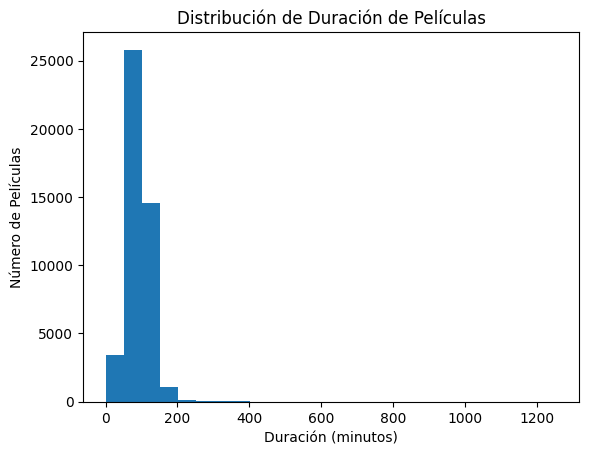

In [40]:
#Distribucion de la duracion de las peliculas
 
plt.hist(df_peliculas['runtime'], bins=25)  # Ajusta el número de bins según tus datos
plt.xlabel('Duración (minutos)')
plt.ylabel('Número de Películas')
plt.title('Distribución de Duración de Películas')
plt.show()

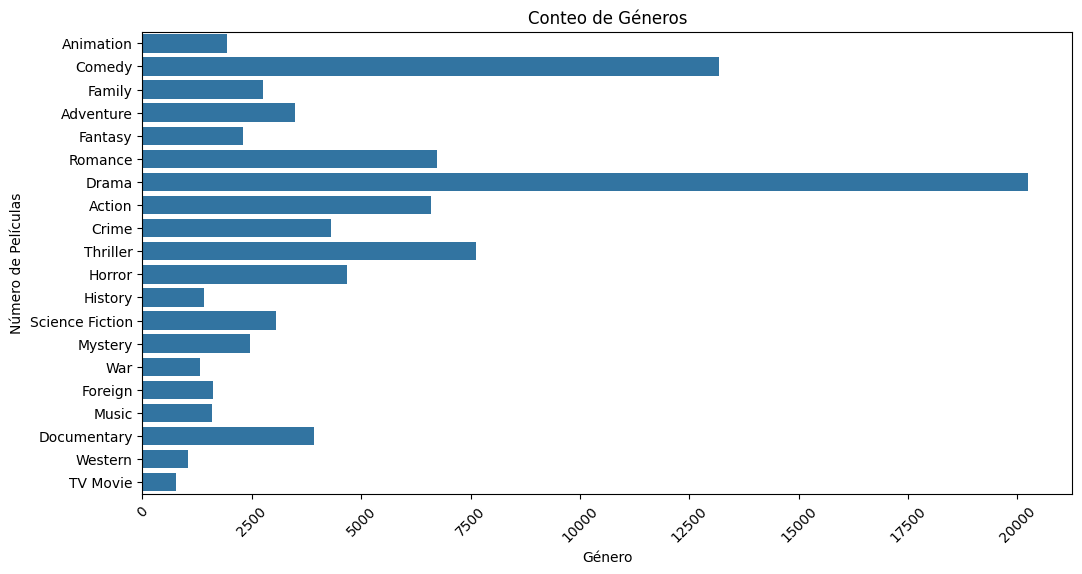

In [41]:
#Conteo de los géneros 

plt.figure(figsize=(12, 6))
sns.countplot(df_peliculas['genres'].explode())
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.title('Conteo de Géneros')
plt.show()

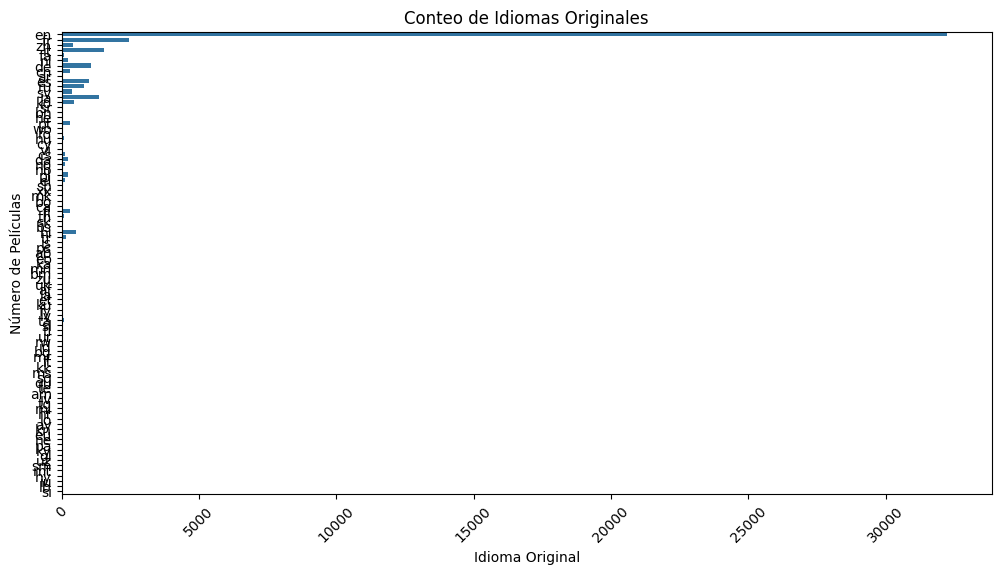

In [42]:
#Conteo de los idiomas originales

plt.figure(figsize=(12, 6))
sns.countplot(df_peliculas['original_language'])
plt.xticks(rotation=45)
plt.xlabel('Idioma Original')
plt.ylabel('Número de Películas')
plt.title('Conteo de Idiomas Originales')
plt.show()

In [43]:
#Conteo de la frecuencia de cada idioma original
conteo_idiomas = df_peliculas['original_language'].value_counts()

In [44]:
#Selecciono los idiomas más frecuentes
idiomas_frecuentes = conteo_idiomas.head(10).index  # Toma los 10 primeros


In [45]:
# Filtro el DataFrame original para dejar solo las peliculas incluidas en los idiomas mas frecuentes
df_peliculas = df_peliculas[df_peliculas['original_language'].isin(idiomas_frecuentes)]

In [46]:
# Creo una máscara booleana para identificar las filas a eliminar
mask = ~df_peliculas['original_language'].isin(idiomas_frecuentes)

# Elimino las filas que no cumplen la condición
df_peliculas.drop(df_peliculas[mask].index, inplace=True)

In [47]:
# Calculo la correlación entre las columnas 'runtime' y 'budget' directamente
correlacion = df_peliculas['runtime'].corr(df_peliculas['budget'])

print("La correlación entre duración y presupuesto es:", correlacion)

La correlación entre duración y presupuesto es: 0.13919385097040246


In [48]:
# Convirtiendo la columna 'budget' a float type directamente
df_peliculas['budget'] = df_peliculas['budget'].astype(float)

In [49]:
# Calculo la correlación entre las columnas 'return' y 'budget' directamente
correlacion = df_peliculas['return'].corr(df_peliculas['budget'])

print("La correlación entre retorno de inversión y presupuesto es:", correlacion)

La correlación entre retorno de inversión y presupuesto es: nan


c:\Users\jugas\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [50]:
# Verifico el tipo de dato de la columna "return"
print(df_peliculas['return'].dtype)

# Convierto a numérico si es necesario
df_peliculas['return'] = pd.to_numeric(df_peliculas['return'], errors='coerce')

# Conteo de valores infinitos
cantidad_inf = df_peliculas[np.isinf(df_peliculas['return'])].shape[0]
print(f"Cantidad de registros con infinito: {cantidad_inf}")


float64
Cantidad de registros con infinito: 1927


In [51]:
# Elimino filas con valores infinitos
df_peliculas = df_peliculas[~np.isinf(df_peliculas['return'])]

In [52]:
# Calculo la correlación entre las columnas 'return' y 'budget' directamente
correlacion = df_peliculas['return'].corr(df_peliculas['budget'])

print("La correlación entre retorno de inversión y presupuesto es:", correlacion)

La correlación entre retorno de inversión y presupuesto es: -0.0024161440768920993


In [53]:
# Identifico las películas que tienen un runtime mayor a 330 (porque quiere decir que son miniseries y no quiero que esten en mi análisis)
peliculas_a_eliminar = df_peliculas[df_peliculas['runtime'] > 330]['id'].unique()

# Filtro el df y lo reescribo
df_peliculas.drop(df_peliculas[df_peliculas['id'].isin(peliculas_a_eliminar)].index, inplace=True)


print(df_peliculas)

           belongs_to_collection      budget  \
0           Toy Story Collection  30000000.0   
1                 not collection  65000000.0   
2      Grumpy Old Men Collection         0.0   
3                 not collection  16000000.0   
5                 not collection  60000000.0   
...                          ...         ...   
45459             not collection         0.0   
45460             not collection         0.0   
45463             not collection         0.0   
45464             not collection         0.0   
45465             not collection         0.0   

                                 genres        id original_language  \
0           [Animation, Comedy, Family]     862.0                en   
1          [Adventure, Fantasy, Family]    8844.0                en   
2                     [Romance, Comedy]   15602.0                en   
3              [Comedy, Drama, Romance]   31357.0                en   
5      [Action, Crime, Drama, Thriller]     949.0                en 

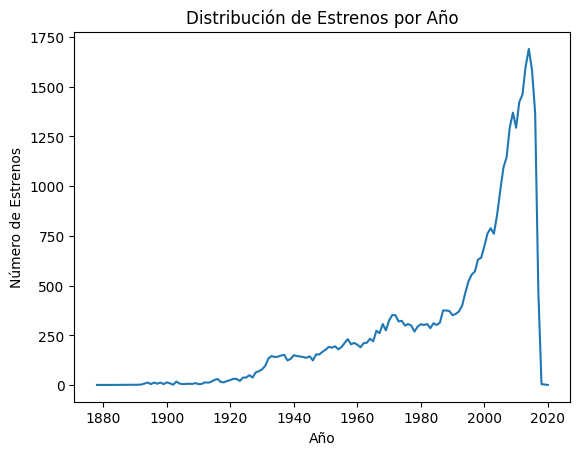

In [54]:
#Armo un gráfico de lineas para ver la distribución de estrenos anuales a lo largo del tiempo
df_agrupado = df_peliculas.groupby('release_year')['title'].count().reset_index(name='num_estrenos')

# Gráfico de línea
sns.lineplot(x='release_year', y='num_estrenos', data=df_agrupado)
plt.title('Distribución de Estrenos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Estrenos')
plt.show()

In [55]:
# Filtro las películas estrenadas a partir de 1980 
df_peliculas = df_peliculas[df_peliculas['release_year'] >= 1980]

In [56]:
# Calculo la correlación entre las columnas 'return' y 'budget' directamente
correlacion = df_peliculas['return'].corr(df_peliculas['budget'])

print("La correlación entre retorno de inversión y presupuesto es:", correlacion)

La correlación entre retorno de inversión y presupuesto es: -0.002826234291070623


In [57]:
df_genres_dummies = pd.DataFrame({'genres': ['Comedy,Drama', 'Action,Adventure','Crime,Thriller', 'War,Foreign','Science Fiction,Mystery', 'Animation,Family', "Fantasy,Romance", "Horror,History", "Music,Documentary", "Western,TV Movie"]})
df_genres_dummies = df_genres_dummies['genres'].str.get_dummies(sep=',')
print(df_genres_dummies)

   Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       0          0          0       1      0            0      1       0   
1       1          1          0       0      0            0      0       0   
2       0          0          0       0      1            0      0       0   
3       0          0          0       0      0            0      0       0   
4       0          0          0       0      0            0      0       0   
5       0          0          1       0      0            0      0       1   
6       0          0          0       0      0            0      0       0   
7       0          0          0       0      0            0      0       0   
8       0          0          0       0      0            1      0       0   
9       0          0          0       0      0            0      0       0   

   Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0        0        0        0       0      0        0        0   
1        0 

In [58]:
# Concateno temporalmente el df de dummies de géneros y la columna return para calcular la correlación
correlation_matrix = pd.concat([df_peliculas['return'], df_genres_dummies], axis=1).corr()

# Extraigo la fila correspondiente a 'return'
print(correlation_matrix.loc['return'])

return             1.000000
Action             0.039072
Adventure          0.039072
Animation         -0.046728
Comedy             0.824062
Crime             -0.338360
Documentary       -0.166722
Drama              0.824062
Family            -0.046728
Fantasy           -0.338360
Foreign            0.136881
History           -0.338360
Horror            -0.338360
Music             -0.166722
Mystery                 NaN
Romance           -0.338360
Science Fiction         NaN
TV Movie           0.228513
Thriller          -0.338360
War                0.136881
Western            0.228513
Name: return, dtype: float64


In [59]:
# Concateno temporalmente el df de dummies de géneros y la columna popularity para calcular la correlación
correlation_matrix = pd.concat([df_peliculas['popularity'], df_genres_dummies], axis=1).corr()

# Extraigo la fila correspondiente a 'return'
print(correlation_matrix.loc['popularity'])

popularity         1.000000
Action             0.306897
Adventure          0.306897
Animation          0.355647
Comedy             0.571257
Crime              0.022636
Documentary       -0.324811
Drama              0.571257
Family             0.355647
Fantasy           -0.247311
Foreign           -0.398365
History           -0.467966
Horror            -0.467966
Music             -0.324811
Mystery                 NaN
Romance           -0.247311
Science Fiction         NaN
TV Movie           0.182018
Thriller           0.022636
War               -0.398365
Western            0.182018
Name: popularity, dtype: float64


In [60]:
# Concateno temporalmente el df de dummies de géneros y la columna vote_average para calcular la correlación
correlation_matrix = pd.concat([df_peliculas['vote_average'], df_genres_dummies], axis=1).corr()

# Extraigo la fila correspondiente a 'return'
print(correlation_matrix.loc['vote_average'])

vote_average       1.000000
Action             0.175740
Adventure          0.175740
Animation          0.537261
Comedy             0.537261
Crime             -0.005021
Documentary       -0.456923
Drama              0.537261
Family             0.537261
Fantasy           -0.140592
Foreign           -0.185782
History           -0.502113
Horror            -0.502113
Music             -0.456923
Mystery                 NaN
Romance           -0.140592
Science Fiction         NaN
TV Movie           0.040169
Thriller          -0.005021
War               -0.185782
Western            0.040169
Name: vote_average, dtype: float64


In [61]:
#hago una matriz de dummies para los idiomas frecuentes

df_idiomas_dummies = pd.get_dummies(idiomas_frecuentes)

In [62]:
# Concateno temporalmente el df de dummies de idiomas frecuentes y la columna return para calcular la correlación
correlation_matrix3 = pd.concat([df_peliculas['return'], df_idiomas_dummies], axis=1).corr()

# Extraigo la fila correspondiente a return
print(correlation_matrix3.loc['return'])

return    1.000000
de             NaN
en        0.824062
es       -0.046728
fr        0.039072
hi       -0.338360
it       -0.338360
ja        0.136881
ko       -0.166722
ru       -0.338360
zh        0.228513
Name: return, dtype: float64


In [63]:
# Concateno temporalmente el df de dummies de idiomas frecuentes y la columna popularity para calcular la correlación
correlation_matrix3 = pd.concat([df_peliculas['popularity'], df_idiomas_dummies], axis=1).corr()

# Extraigo la fila correspondiente a return
print(correlation_matrix3.loc['popularity'])

popularity    1.000000
de                 NaN
en            0.571257
es            0.355647
fr            0.306897
hi           -0.467966
it            0.022636
ja           -0.398365
ko           -0.324811
ru           -0.247311
zh            0.182018
Name: popularity, dtype: float64


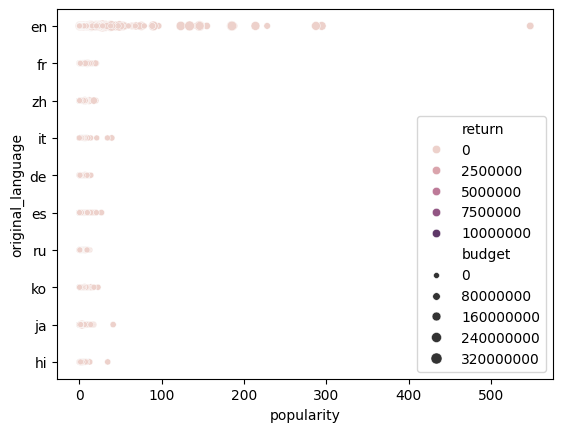

In [64]:
# Armo un grafico que me ayude a ver la relacion entre los idiomas frecuentes y la popularidad, controlando otras variables al mismo tiempo
sns.scatterplot(data=df_peliculas, x="popularity", y="original_language", hue="return", size="budget")
plt.show()

In [65]:
df_reparto.head()

,id,title,return,name
0,862.0,Toy Story,12.451801,George C. Scott
42,8844.0,Jumanji,4.043035,Lawrence Kasdan
46,11860.0,Sabrina,0.000000,Athol Fugard
48,9091.0,Sudden Death,1.838576,J. Farrell MacDonald
101,710.0,GoldenEye,6.072311,An Dorthe Braker
